# Data Preparation

**Data Source**: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Here, we will do:
- Missing value treatment
- Outlier treatment
- Machine Learning Attempt
- Feature Engineering

## Load Libraries and Dataset

In [1]:
# load libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# load dataset
train = pd.read_csv(r'C:\Users\LW130003\Documents\GitHub\house-price\train.csv')
test = pd.read_csv(r'C:\Users\LW130003\Documents\GitHub\house-price\test.csv')

#Combine train and test into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)

data.shape

(2919, 82)

# 0. Drop columns

From data exploration, we can drop 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'. We will keep the other features even though they have low correlation for further observation.

In [2]:
data.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'],axis=1,inplace=True)

# 1. Missing value treatments

In [3]:
# check missing value
misval = data.isnull().sum() #sum of missing value
misval = misval[misval>0] #print only the feature and number of missing value
# where = misval.nonzero()[0].tolist() #location of feature with missing value
# misval[where] #print only the feature and number of missing value
print(misval)

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


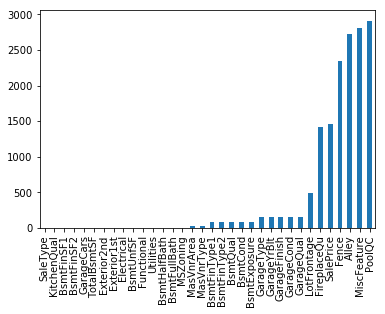

In [4]:
# plot missing value
misval.sort_values(inplace=True)
misval.plot.bar();

From, data.shape we know there are 5 features with over 50% of data missing (exclude 'SalePrice'). We will also drop them.

In [5]:
# Drop the 5 features with over 50% missing
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1,inplace=True)

In [6]:
"""
# Loop and print categorical value and number of its unique value
for category in categories:
    print('\nFrequency count for feature %s'%category)
    print(data[category].value_counts())
# loop and print the categorical feature unique value
for feature in categories:
    print(str(feature)+ ':' + str(data[feature].unique()))
"""

"\n# Loop and print categorical value and number of its unique value\nfor category in categories:\n    print('\nFrequency count for feature %s'%category)\n    print(data[category].value_counts())\n# loop and print the categorical feature unique value\nfor feature in categories:\n    print(str(feature)+ ':' + str(data[feature].unique()))\n"

Next, we will treat the rest of missing value (except SalePrice) by imputing them with their mean or mode.

In [7]:
# categorical and numerical
# categories = [f for f in data.columns if data.dtypes[f] == 'object']
categories = data.describe(include=['O']).columns.tolist() 
categories.remove('source') #remove 'source'

# numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical = data.describe().columns.tolist()
numerical.remove('SalePrice') #remove 'SalePrice'

# Fill the missing value in features with mean/mode
for i, feature in enumerate(categories):
    data[feature].fillna(data[feature].mode()[0],inplace=True)
    
for i, feature in enumerate(numerical):
    data[feature].fillna(data[feature].mean(),inplace=True)

# Check if there is still any missing column
misval = data.isnull().sum() #sum of missing value
where = misval.nonzero()[0].tolist() #location of feature with missing value
misval[where] #print only the feature and number of missing value

SalePrice    1459
dtype: int64

# 2. Outlier treatment

From data exploration, we have decided to log transform 'SalePrice' and as it has too many outlier and metric used.

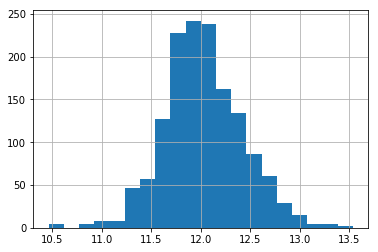

In [8]:
data['SalePrice_log'] = np.log(data['SalePrice'])
data['SalePrice_log'].hist(bins=20);

# 3. One Hot Encoding
Most of Machine Learning algorithm can not accept sting value. Hence, we need to convert them to numerical.

In [9]:
# One hot encoder
# There are 2 methods
# method 1 get_dummies method
data2 = data.copy()
data3 = data.copy()
data = pd.get_dummies(data, columns=categories)

# method 2 fit_transform method
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categories:
    data2[i] = le.fit_transform(data2[i].values.tolist())

Separate train and test before machine learning attempt

In [10]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

# drop source column for train and source and SalePrice for test
train.drop('source',axis=1,inplace=True)
test.drop(['source','SalePrice'],axis=1,inplace=True)

C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 3. Machine Learning Attempt
In this section, we will build simple predictive model for testing.

In [11]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\LW130003\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Separate train and test before machine learning attempt

In [12]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

Generic function

In [13]:
# generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train] 
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])  

Next, we will test the dataset with Logistic Regression, Decision Tree, Random Forest, 

In [14]:
# logistic regression
outcome_var = 'SalePrice'
model = LogisticRegression()
predictor_var = ['OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt'] #from data exploration picked the one with highest correlation
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 5.890%
Cross-Validation Score : 1.233%


Accuracy : 97.397%
Cross-Validation Score : 0.274%


GrLivArea      0.302677
TotalBsmtSF    0.263469
YearBuilt      0.259136
OverallQual    0.090460
GarageCars     0.074574
dtype: float64

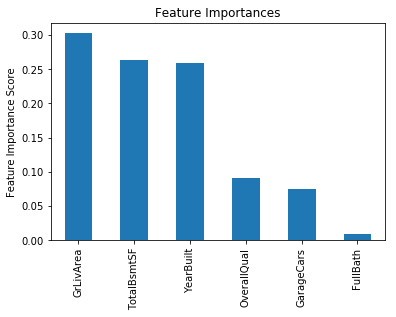

In [15]:
# decision tree
outcome_var = 'SalePrice'
model = DecisionTreeClassifier()
predictor_var = ['OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt'] #from data exploration picked the one with highest correlation
classification_model(model, train,predictor_var,outcome_var)

# plot feature importance
feat_imp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score') 

feat_imp.nlargest()

Accuracy : 95.753%
Cross-Validation Score : 0.616%


GrLivArea      0.300411
TotalBsmtSF    0.293994
YearBuilt      0.260305
OverallQual    0.068069
GarageCars     0.051858
dtype: float64

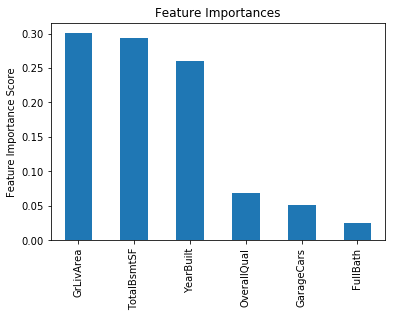

In [16]:
# random forest
outcome_var = 'SalePrice'
model = RandomForestClassifier()
predictor_var = ['OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt'] #from data exploration picked the one with highest correlation
classification_model(model, train,predictor_var,outcome_var)

# plot feature importance
feat_imp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score') 

feat_imp.nlargest()

Above, we could conclude:
- LogisticRegression may not be a suitable algorithm
- We need to include categorical data to improve CV score.

Next, we will only use the categorical data as predictor_var, and plot feature importance for Decision Tree and RandomForest

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 271 entries, 2ndFlrSF to Utilities_NoSeWa
dtypes: float64(12), int64(24), object(1), uint8(234)
memory usage: 807.1+ KB


In [18]:
train.select_dtypes(include=['uint8'], exclude=None).columns.tolist()

['BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',


In [19]:
# logistic regression
categories = train.describe(include=['O']).columns.tolist() 
outcome_var = 'SalePrice'
model = LogisticRegression()
predictor_var = train.select_dtypes(include=['uint8'], exclude=None).columns.tolist() #use all categorical features that are not dropped
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 83.699%
Cross-Validation Score : 0.479%


Accuracy : 97.740%
Cross-Validation Score : 0.342%


BsmtFinType1_Unf      0.027867
HouseStyle_1Story     0.027148
LotShape_Reg          0.023717
MasVnrType_BrkFace    0.022630
LotShape_IR1          0.021236
dtype: float64

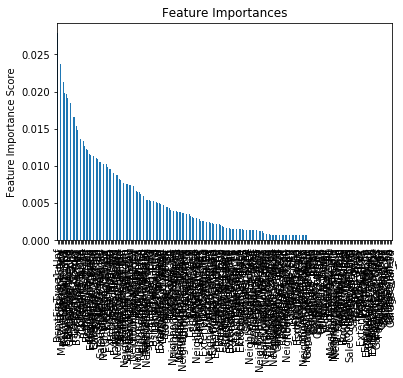

In [20]:
# decision tree
categories = train.describe(include=['O']).columns.tolist() 
outcome_var = 'SalePrice'
model = DecisionTreeClassifier()
predictor_var = train.select_dtypes(include=['uint8'], exclude=None).columns.tolist() #use all categorical features that are not dropped
classification_model(model, train,predictor_var,outcome_var)

# plot feature importance
feat_imp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score') 

feat_imp.nlargest()

Accuracy : 97.192%
Cross-Validation Score : 0.548%


LotShape_IR1         0.020030
BsmtFinType1_Unf     0.018601
HouseStyle_2Story    0.017789
BsmtExposure_No      0.017565
LotShape_Reg         0.017408
dtype: float64

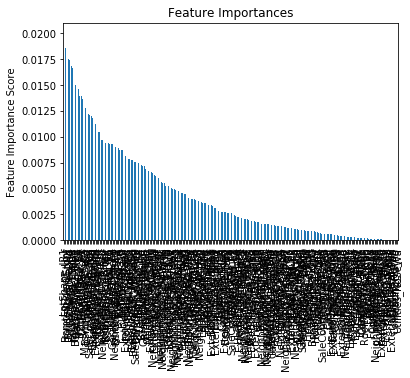

In [21]:
# random forest
categories = train.describe(include=['O']).columns.tolist() 
outcome_var = 'SalePrice'
model = RandomForestClassifier()
predictor_var = train.select_dtypes(include=['uint8'], exclude=None).columns.tolist() #use all categorical features that are not dropped
classification_model(model, train,predictor_var,outcome_var)

# plot feature importance
feat_imp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score') 

feat_imp.nlargest()

In conclusion, 